In [2]:
pip install opendatasets --upgrade

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paravgupta7
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:01<00:00, 354MB/s]


In [4]:
filename="/content/us-accidents/US_Accidents_March23.csv"

## **DATA CLEANING AND PREPARATION**

In [5]:
import numpy as np
import pandas as pd
df=pd.read_csv(filename,chunksize=10000)
sampled_df = pd.concat([chunk.sample(frac=0.1) for chunk in df])
sampled_df.to_csv(filename, index=False)

In [6]:
sampled_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
sampled_df.shape

(772839, 46)

In [ ]:
sampled_df.head()

In [8]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772839 entries, 1813 to 7723238
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432550 non-null  float64
 8   End_Lng                432550 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772839 non-null  object 
 11  Street                 771771 non-null  object 
 12  City                   772804 non-null  object 
 13  County                 772839 non-null  object 
 14  State                  772839 non-nul

In [9]:
sampled_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,772839.000000,772839.000000,772839.000000,432550.000000,432550.000000,772839.000000,756669.000000,573255.000000,755597.000000,759034.000000,755345.000000,715786.000000,552866.000000
mean,2.212989,36.212330,-94.712807,36.277938,-95.752418,0.561689,61.653921,58.227480,64.841225,29.537040,9.087429,7.682834,0.008290
std,0.488395,5.075339,17.398063,5.272979,18.117976,1.784295,19.023048,22.411705,22.834202,1.008872,2.687108,5.385109,0.099497
min,1.000000,24.555269,-124.548074,24.570107,-124.545748,0.000000,-89.000000,-89.000000,1.000000,0.300000,0.000000,0.000000,0.000000
25%,2.000000,33.407310,-117.222105,33.462328,-117.761510,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.831731,-87.784970,36.203520,-88.037070,0.030000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.089280,-80.352972,40.188020,-80.247016,0.463000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,49.000493,-67.606875,49.002223,-67.626605,210.080002,174.000000,174.000000,100.000000,58.630000,111.000000,822.800000,10.140000


In [10]:
sampled_df.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,340289
End_Lng,340289
Distance(mi),0


In [11]:
missing_values=sampled_df.isna().sum().sort_values(ascending=False)/len(sampled_df)*100
missing_values

,0
End_Lng,44.031034
End_Lat,44.031034
Precipitation(in),28.462979
Wind_Chill(F),25.824784
Wind_Speed(mph),7.382262
Visibility(mi),2.263602
Wind_Direction,2.239147
Humidity(%),2.230995
Weather_Condition,2.212751
Temperature(F),2.092286


In [12]:
missing_values=missing_values[missing_values!=0]

<Axes: xlabel='Percentage of Missing Values', ylabel='Features'>

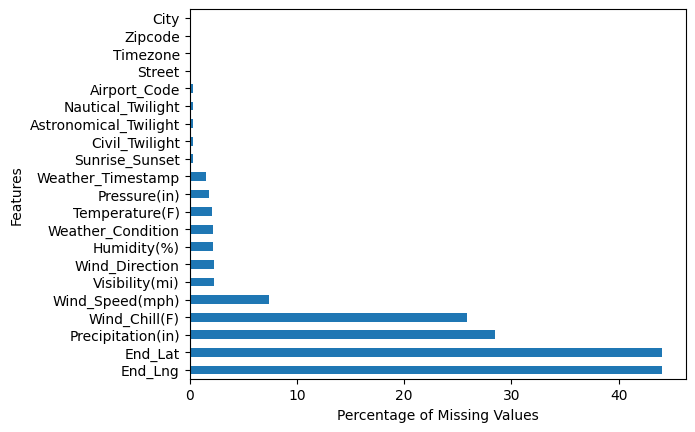

In [13]:
missing_values.plot(kind='barh', xlabel='Percentage of Missing Values', ylabel='Features')

In [14]:
sampled_df=sampled_df.drop(['End_Lat', 'End_Lng'],axis=1)

In [15]:
sampled_df.shape

(772839, 44)

## **EXPLORATORY ANALYSIS AND VISUALIZATION**
*   CITY
*   START TIME
*   LAT,LONG
*   TEMP


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
sampled_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

***CITIES***

In [18]:
cities_name=sampled_df.City.unique()
print(len(cities_name))
cities_accidents=sampled_df.City.value_counts()
print(cities_accidents)

10271
City
Miami            18463
Houston          16918
Los Angeles      15608
Charlotte        13853
Dallas           13202
                 ...  
Hunters              1
Sharpsville          1
Waleska              1
Hampton Falls        1
Clute                1
Name: count, Length: 10270, dtype: int64


In [23]:
print(cities_accidents['New York'])

2193


<Axes: ylabel='City'>

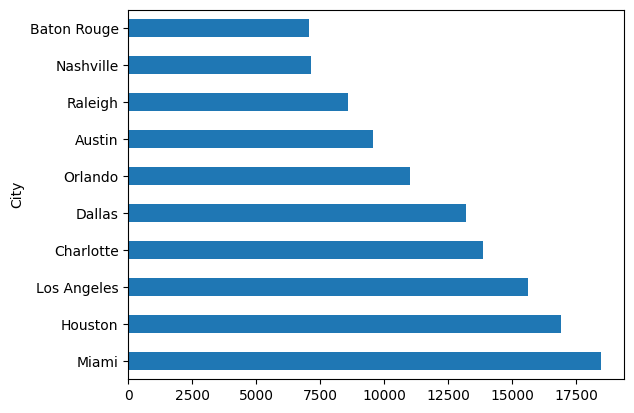

In [27]:
cities_accidents[:10].plot(kind='barh')

<Axes: xlabel='count', ylabel='Count'>

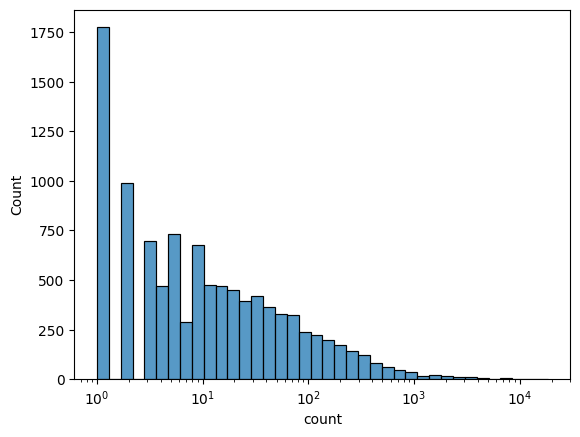

In [28]:
sns.histplot(cities_accidents,log_scale=True)

In [29]:
high_accident_cities=cities_accidents[cities_accidents>=1000]
print(len(high_accident_cities))
low_accident_cities=cities_accidents[cities_accidents<1000]
print(len(low_accident_cities))

103
10167


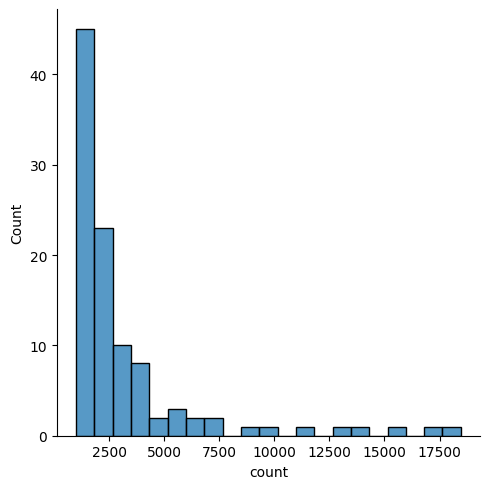

In [31]:
sns.displot(high_accident_cities)

***TIME***

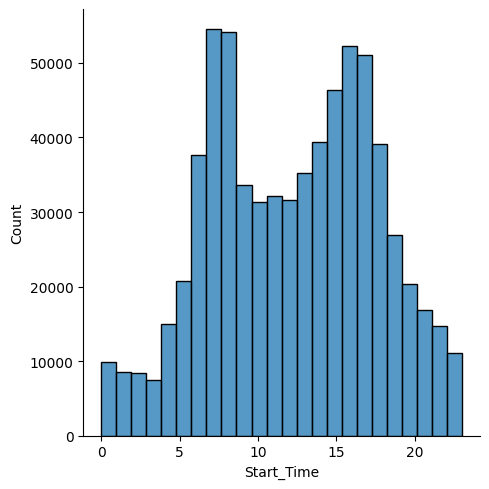

In [35]:
sampled_df.Start_Time = pd.to_datetime(sampled_df.Start_Time, errors='coerce')
sns.displot(sampled_df.Start_Time.dt.hour, bins=24, kde=False)

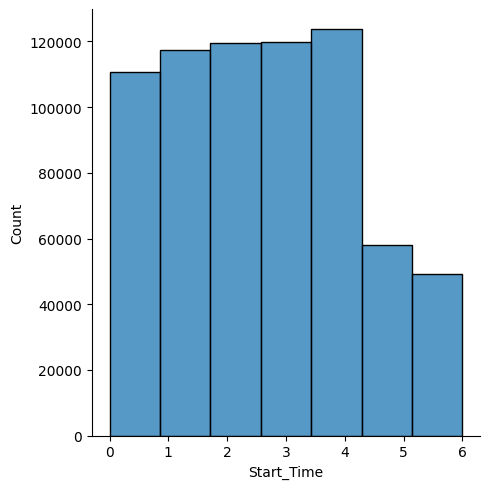

In [38]:
sns.displot(sampled_df.Start_Time.dt.dayofweek, bins=7, kde=False)

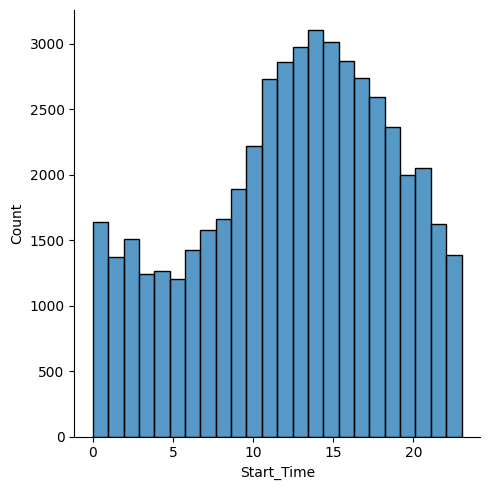

In [41]:
sundays_start_time = sampled_df.Start_Time[sampled_df.Start_Time.dt.dayofweek == 6]
sns.displot(sundays_start_time.dt.hour, bins=24, kde=False)

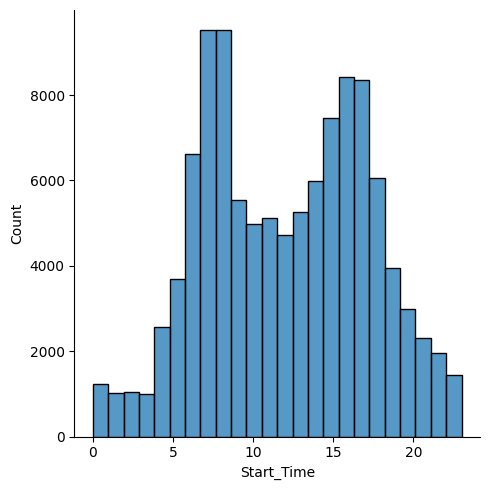

In [42]:
monday_start_time = sampled_df.Start_Time[sampled_df.Start_Time.dt.dayofweek == 0]
sns.displot(monday_start_time.dt.hour, bins=24, kde=False)

<Axes: ylabel='count'>

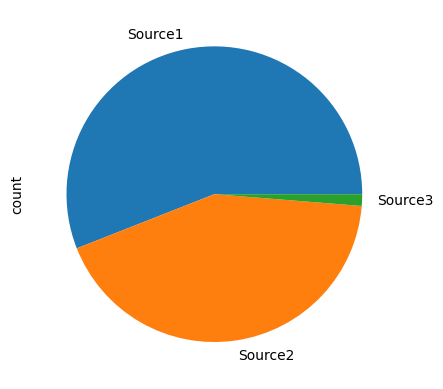

In [44]:
sampled_df.Source.value_counts().plot(kind='pie')


***LATITUES AND LONGITUDES***

In [45]:
sampled_df.Start_Lat

,Start_Lng
1813,-121.020950
9862,-121.471695
945,-120.969086
7721,-122.053314
1573,-121.512390
...,...
7724213,-121.173630
7720408,-122.565180
7720193,-86.831159
7721555,-112.170360


In [50]:
sampled_df.Start_Lng

,Start_Lng
1813,-121.020950
9862,-121.471695
945,-120.969086
7721,-122.053314
1573,-121.512390
...,...
7724213,-121.173630
7720408,-122.565180
7720193,-86.831159
7721555,-112.170360


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

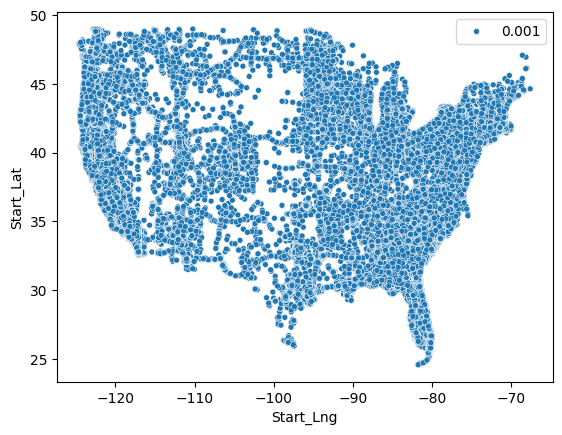

In [49]:
sns.scatterplot(x=sampled_df.Start_Lng, y=sampled_df.Start_Lat, size=0.001)

***TEMPERATURE***

In [56]:
sampled_df['Temperature(F)'].describe()

,Temperature(F)
count,756669.000000
mean,61.653921
std,19.023048
min,-89.000000
25%,49.000000
50%,64.000000
75%,76.000000
max,174.000000


In [60]:
sampled_df['Temperature(C)']=((sampled_df['Temperature(F)']-32)*(5/9))

In [61]:
sampled_df[['Temperature(C)', 'Temperature(F)']]

,Temperature(C),Temperature(F)
1813,33.000000,91.4
9862,2.777778,37.0
945,24.000000,75.2
7721,7.777778,46.0
1573,38.888889,102.0
...,...,...
7724213,27.222222,81.0
7720408,28.888889,84.0
7720193,25.000000,77.0
7721555,12.222222,54.0


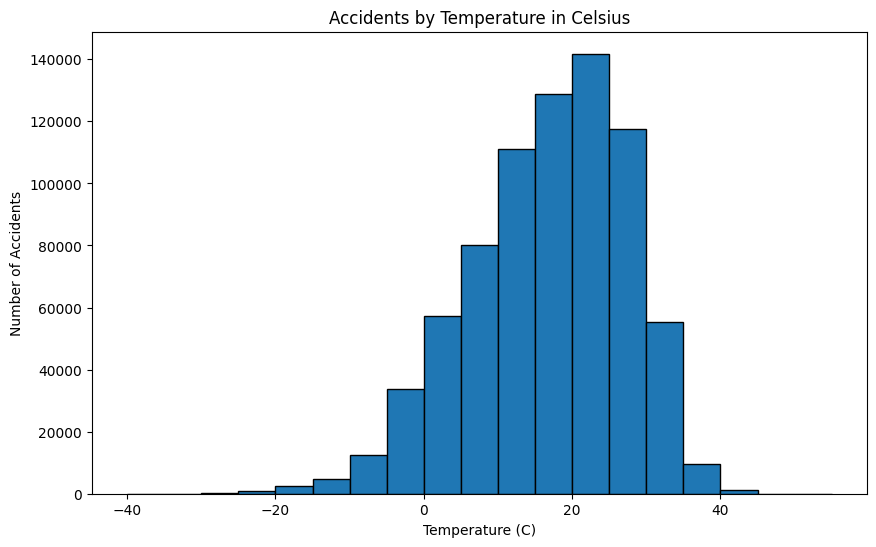

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['Temperature(C)'].dropna(), bins=range(-40, 60, 5), edgecolor='black')
plt.xlabel('Temperature (C)')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Temperature in Celsius')
plt.show()

***MONTH***

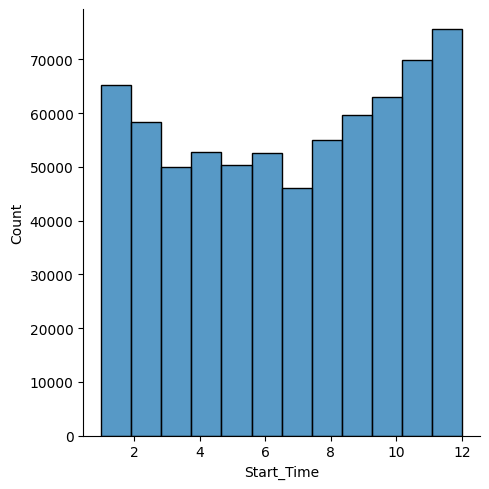

In [71]:
sns.displot(sampled_df.Start_Time.dt.month, bins=12, kde=False)
plt.xlabel='Month'

In [75]:
accidents_5_7 = sampled_df[sampled_df.Start_Time.dt.month.isin([5, 6, 7])]
num_accidents_5_7 = len(accidents_5_7)
print(f"Number of accidents between May to July: {num_accidents_5_7}")

accidents_11_1 = sampled_df[sampled_df.Start_Time.dt.month.isin([11, 12, 1])]
num_accidents_11_1 = len(accidents_11_1)
print(f"Number of accidents between November to January: {num_accidents_11_1}")

# Compare the number of accidents
if num_accidents_5_7 > num_accidents_11_1:
    print("There are more accidents in summers than winters.")
elif num_accidents_11_1 > num_accidents_5_7:
    print("There are more accidents in winters than summers.")
else:
    print("The number of accidents in summers and winters is the same.")
difference=abs(num_accidents_5_7-num_accidents_11_1)
print('Difference=', difference)

Number of accidents between May to July: 149031
Number of accidents between November to January: 210742
There are more accidents in winters than summers.
Difference= 61711


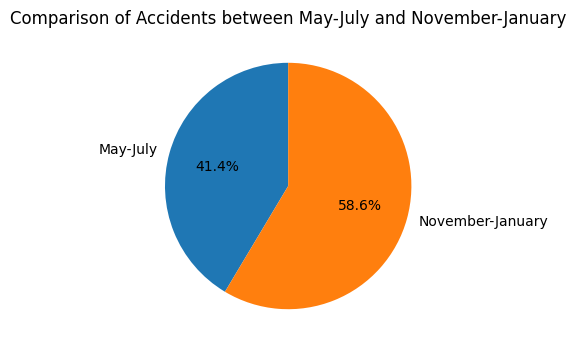

In [77]:
labels = ['May-July', 'November-January']
sizes = [num_accidents_5_7, num_accidents_11_1]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of Accidents between May-July and November-January')
plt.show()

## **INFERENCES**



---


#**City-wise Analysis**

Big cities experience more accidents due to higher population density and vehicle volume.


---


#**Time-based Patterns**

*Peak accident times:*

Morning: 8 AM – 9 AM and Evening: 4 PM – 5 PM

*Weekday vs Weekend:*

Fewer accidents on Saturdays and Sundays.

Sunday Trend: Higher accident count between 11 AM – 6 PM (Recreational Activites).

Monday Trend: Spikes during 8 AM – 9 AM and 4 PM – 5 PM (Office hours lie in between these times).


---


# **Data Sources**

*Location (Latitude & Longitude)*

When plotted, reveals the USA map with dense accident activity along the coasts.

The central region appears sparsely populated in terms of accidents.


---


# **Temperature Data**

Accident-prone temperature range: '25°C – 35°C'.


Higher frequency of accidents in 'winter months', possibly due to slippery roads, reduced visibility, and harsh weather conditions.